<a href="https://colab.research.google.com/github/andzagz/sc-healthcare-trends/blob/main/cluster_ouvidoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import glob

# Define o caminho base para os arquivos
base_path = '/content/drive/MyDrive/Colab Notebooks/Case beneficiarios/'
filename_template = 'PDA_Atualizacao_Demandas_dos_Consumidores_Reclamacao_de_Beneficiarios_{}.csv'

# Lista para armazenar os DataFrames
dataframes = []

# Loop através dos anos de 2021 a 2024
for year in range(2021, 2025):
    # Cria o caminho do arquivo para o ano atual
    file_path = base_path + filename_template.format(year)

    # Verifica se o arquivo existe
    if glob.glob(file_path):
        try:
            # Lê o arquivo CSV especificando o delimitador e tentando diferentes codificações
            df = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')
            dataframes.append(df)
        except UnicodeDecodeError:
            print(f"Erro de codificação ao ler o arquivo: {file_path}")
        except pd.errors.ParserError:
            print(f"Erro de parsing ao ler o arquivo: {file_path}")
    else:
        print(f"Arquivo não encontrado: {file_path}")

# Concatena todos os DataFrames em um só DataFrame
if dataframes:
    full_df = pd.concat(dataframes, ignore_index=True)
    # Exibe as primeiras linhas do DataFrame combinado
    print(full_df.head())
else:
    print("Nenhum arquivo foi lido com sucesso.")


   NUMERO_DEMANDA            DATA_ATENDIMENTO  \
0       5268753.0  23/07/2021 00:00:00.000000   
1       5282161.0  03/08/2021 00:00:00.000000   
2       5363084.0  30/09/2021 00:00:00.000000   
3       5094779.0  26/02/2021 00:00:00.000000   
4       5447065.0  02/12/2021 00:00:00.000000   

                                      STATUS_DEMANDA ENCAMINHADO_OUVIDORIA  \
0                                 Demanda Finalizada                   NÃO   
1  Resposta do Interlocutor à solução do Conflito...                   NÃO   
2                                       Arquivamento                   NÃO   
3           Prazo de Resposta do Consumidor expirado                   NÃO   
4  Resposta do Interlocutor à solução do Conflito...                   NÃO   

  MEIO_ATENDIMENTO                                            ASSUNTO  \
0             Site  Produto ou Plano >> Cobertura >> Regras para A...   
1         Telefone  Produto ou Plano >> Cobertura >> Regras para A...   
2         Telefon

In [ ]:
# Supondo que full_df seja o DataFrame combinado
column_names = full_df.columns.tolist()

# Exibe a lista de nomes das colunas
print(column_names)

['NUMERO_DEMANDA', 'DATA_ATENDIMENTO', 'STATUS_DEMANDA', 'ENCAMINHADO_OUVIDORIA', 'MEIO_ATENDIMENTO', 'ASSUNTO', 'REGISTRO_ANS', 'NOME_OPERADORA', 'MODALIDADE_OPERADORA', 'TIPO_PLANO_CONTRATADO', 'EPOCA_CONTRATACAO_PLANO', 'COBERTURAS_CONTRATADAS', 'DT_NASC_BENEFICIARIO', 'SEXO', 'UF_BENEFICIARIO', 'CD_MUN_BENEFICIARIO', 'NOME_PROCEDIMENTO', 'UF_ATENDIMENTO_BENEFICIARIO', 'NUMERO_PROCESSO']


In [ ]:
# Lista de colunas desejadas
columns_to_select = [
    'DATA_ATENDIMENTO', 'STATUS_DEMANDA', 'ENCAMINHADO_OUVIDORIA',
    'ASSUNTO', 'NOME_OPERADORA', 'MODALIDADE_OPERADORA',
    'TIPO_PLANO_CONTRATADO', 'COBERTURAS_CONTRATADAS', 'NOME_PROCEDIMENTO',
    'DT_NASC_BENEFICIARIO', 'SEXO', 'UF_ATENDIMENTO_BENEFICIARIO'
]

# Seleciona as colunas do DataFrame
selected_df = full_df[columns_to_select]

# Exibe as primeiras linhas do DataFrame selecionado
selected_df



,DATA_ATENDIMENTO,STATUS_DEMANDA,ENCAMINHADO_OUVIDORIA,ASSUNTO,NOME_OPERADORA,MODALIDADE_OPERADORA,TIPO_PLANO_CONTRATADO,COBERTURAS_CONTRATADAS,NOME_PROCEDIMENTO,DT_NASC_BENEFICIARIO,SEXO,UF_ATENDIMENTO_BENEFICIARIO
0,23/07/2021 00:00:00.000000,Demanda Finalizada,NÃO,Produto ou Plano >> Cobertura >> Regras para A...,BRADESCO SAÚDE S.A.,Seguradora Especializada em Saúde,Coletivo Empresarial,Ambulatorial + Hospitalar c/ Obstetrícia + Odo...,PUNÇÃO OU INFILTRAÇÃO ARTICULAR DIAGNÓSTICA OU...,25/12/1988 00:00:00.000000,F,SP
1,03/08/2021 00:00:00.000000,Resposta do Interlocutor à solução do Conflito...,NÃO,Produto ou Plano >> Cobertura >> Regras para A...,NOTRE DAME INTERMÉDICA SAÚDE S.A.,Medicina de Grupo,Coletivo Empresarial,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,NaN,11/05/1983 00:00:00.000000,M,SP
2,30/09/2021 00:00:00.000000,Arquivamento,NÃO,Produto ou Plano >> Cobertura >> Regras para A...,UNIMED DO ESTADO DE SÃO PAULO - FEDERAÇÃO ESTA...,Cooperativa Médica,Coletivo Empresarial,Ambulatorial + Hospitalar s/ Obstetrícia (A) +...,CONSULTA/SESSÃO COM FONOAUDIÓLOGO (COM DIRETRI...,02/09/2019 00:00:00.000000,M,PE
3,26/02/2021 00:00:00.000000,Prazo de Resposta do Consumidor expirado,NÃO,Produto ou Plano >> Contratos e Regulamentos >...,BRADESCO SAÚDE S.A.,Seguradora Especializada em Saúde,Coletivo por Adesão,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,NaN,12/09/1969 00:00:00.000000,F,NaN
4,02/12/2021 00:00:00.000000,Resposta do Interlocutor à solução do Conflito...,NÃO,Produto ou Plano >> Cobertura >> Prazos Máximo...,NOTRE DAME INTERMÉDICA SAÚDE S.A.,Medicina de Grupo,Coletivo Empresarial,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,NaN,26/01/2018 00:00:00.000000,M,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
1032333,19/01/2024 00:00:00.000000,Prazo de Resposta do Consumidor expirado,NÃO,Produto ou Plano >> Cobertura >> Regras para A...,HAPVIDA ASSISTENCIA MEDICA S.A.,Medicina de Grupo,NaN,NaN,NaN,15/12/2022 00:00:00.000000,M,MG
1032334,11/06/2024 00:00:00.000000,Tentativa/Contato Consumidor Registrado,NÃO,Produto ou Plano >> Cobertura >> Rol de Proced...,AMEPLAN ASSISTÊNCIA MÉDICA PLANEJADA LTDA,Medicina de Grupo,Individual ou Familiar,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,NaN,20/09/1950 00:00:00.000000,F,SP
1032335,28/02/2024 00:00:00.000000,Prazo de Resposta do Consumidor expirado,NÃO,Produto ou Plano >> Cobertura >> Rede de Atend...,ALICE OPERADORA LTDA.,Medicina de Grupo,Coletivo Empresarial,Ambulatorial + Hospitalar c/ Obstetrícia (A) +...,NaN,05/10/1991 00:00:00.000000,F,SP
1032336,06/05/2024 00:00:00.000000,Alteração Manual,NÃO,Produto ou Plano >> Cobertura >> Rede de Atend...,SUL AMERICA COMPANHIA DE SEGURO SAÚDE,Seguradora Especializada em Saúde,Coletivo Empresarial,Ambulatorial + Hospitalar c/ Obstetrícia + Odo...,NaN,09/10/2018 00:00:00.000000,M,PE


In [ ]:
!pip install kmodes


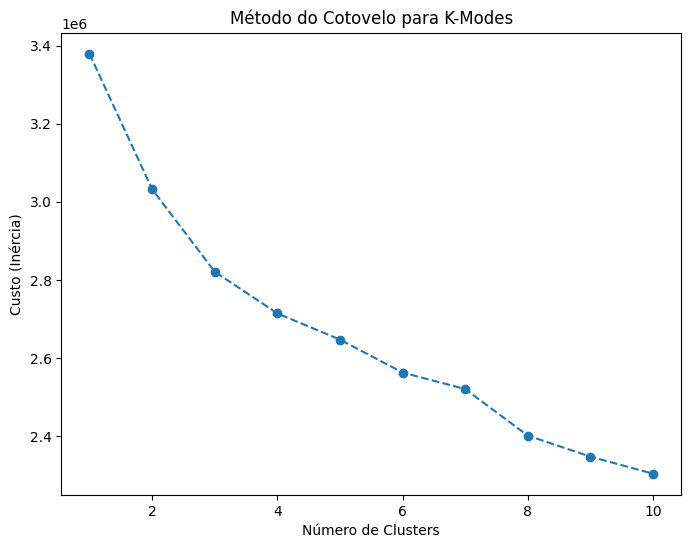

In [ ]:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

# Seleciona as colunas para clusterização
columns_for_clustering = [
    'STATUS_DEMANDA', 'ASSUNTO', 'MODALIDADE_OPERADORA',
    'TIPO_PLANO_CONTRATADO', 'COBERTURAS_CONTRATADAS',
    'NOME_PROCEDIMENTO', 'UF_ATENDIMENTO_BENEFICIARIO'
]

# Cria um DataFrame apenas com as colunas selecionadas
df_clustering = selected_df[columns_for_clustering]

# Preenche valores ausentes com uma string temporária
df_clustering = df_clustering.fillna('Missing')

# Lista para armazenar os erros quadrados (inércia) para diferentes valores de clusters
costs = []

# Testa diferentes números de clusters (por exemplo, de 1 a 10)
for n_clusters in range(1, 11):
    kmodes = KModes(n_clusters=n_clusters, init='Cao', n_init=5, verbose=0)
    clusters = kmodes.fit_predict(df_clustering)
    costs.append(kmodes.cost_)

# Plotar o gráfico do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), costs, marker='o', linestyle='--')
plt.title('Método do Cotovelo para K-Modes')
plt.xlabel('Número de Clusters')
plt.ylabel('Custo (Inércia)')
plt.show()


In [ ]:
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.metrics import pairwise_distances
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

# Função para calcular a silhueta para dados categóricos
def categorical_silhouette_score(X, labels, metric='hamming'):
    # Calcula a matriz de distâncias (usando Hamming)
    D = pairwise_distances(X, metric=metric)

    # Para cada ponto, calculamos a distância média ao seu próprio cluster e ao cluster mais próximo
    A = np.zeros(X.shape[0])  # Distância média dentro do próprio cluster
    B = np.zeros(X.shape[0])  # Distância média ao cluster mais próximo

    for i in range(X.shape[0]):
        same_cluster = labels == labels[i]
        other_clusters = labels != labels[i]

        A[i] = np.mean(D[i, same_cluster])  # Distância média ao próprio cluster
        B[i] = np.min([np.mean(D[i, other_clusters & (labels == label)])
                       for label in np.unique(labels) if label != labels[i]])  # Ao cluster mais próximo

    # Silhueta = (B - A) / max(A, B)
    sil_score = (B - A) / np.maximum(A, B)
    return np.mean(sil_score)  # Retorna a média da silhueta

# Seleciona as colunas para clusterização
columns_for_clustering = [
    'STATUS_DEMANDA', 'ASSUNTO', 'MODALIDADE_OPERADORA',
    'TIPO_PLANO_CONTRATADO', 'COBERTURAS_CONTRATADAS',
    'NOME_PROCEDIMENTO', 'UF_ATENDIMENTO_BENEFICIARIO'
]

# Cria um DataFrame apenas com as colunas selecionadas
df_clustering = selected_df[columns_for_clustering]

# Preenche valores ausentes com uma string temporária
df_clustering = df_clustering.fillna('Missing')

# Converte o DataFrame para numpy array (necessário para cálculo de distâncias)
df_clustering_np = df_clustering.to_numpy()

# Lista para armazenar os valores de silhueta
silhouette_scores = []

# Testa diferentes números de clusters (por exemplo, de 2 a 10)
for n_clusters in range(2, 11):
    kmodes = KModes(n_clusters=n_clusters, init='Cao', n_init=5, verbose=0)
    clusters = kmodes.fit_predict(df_clustering_np)

    # Calcula a pontuação da silhueta para dados categóricos
    score = categorical_silhouette_score(df_clustering_np, clusters, metric='hamming')
    silhouette_scores.append(score)

# Plotar o gráfico da pontuação da silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Pontuação da Silhueta para K-Modes (Dados Categóricos)')
plt.xlabel('Número de Clusters')
plt.ylabel('Pontuação da Silhueta')
plt.show()


ValueError: could not convert string to float: 'Demanda Finalizada'